In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'bluebear78'
os.environ['KAGGLE_KEY'] = '39d305f791ce074d3a7f8d5630fecba2'

In [3]:
!kaggle datasets download -d vishalsubbiah/pokemon-images-and-types

  0% 0.00/2.47M [00:00<?, ?B/s]
100% 2.47M/2.47M [00:00<00:00, 142MB/s]


In [6]:
!unzip *.*

Archive:  pokemon-images-and-types.zip
  inflating: images/images/abomasnow.png  
  inflating: images/images/abra.png  
  inflating: images/images/absol.png  
  inflating: images/images/accelgor.png  
  inflating: images/images/aegislash-blade.png  
  inflating: images/images/aerodactyl.png  
  inflating: images/images/aggron.png  
  inflating: images/images/aipom.png  
  inflating: images/images/alakazam.png  
  inflating: images/images/alomomola.png  
  inflating: images/images/altaria.png  
  inflating: images/images/amaura.png  
  inflating: images/images/ambipom.png  
  inflating: images/images/amoonguss.png  
  inflating: images/images/ampharos.png  
  inflating: images/images/anorith.png  
  inflating: images/images/araquanid.jpg  
  inflating: images/images/arbok.png  
  inflating: images/images/arcanine.png  
  inflating: images/images/arceus.png  
  inflating: images/images/archen.png  
  inflating: images/images/archeops.png  
  inflating: images/images/ariados.png  
  infla

In [9]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use("ggplot")
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [10]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [34]:
data = pd.read_csv("./pokemon.csv")

In [35]:
data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [36]:
data = data.sort_values(by=['Name'],ascending=True).reset_index(drop=True)

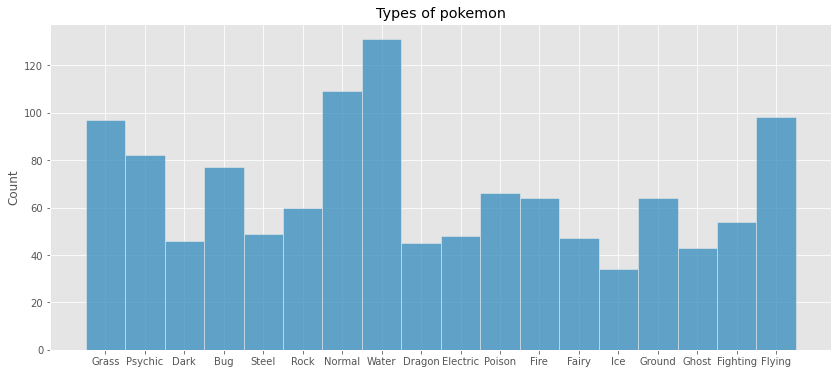

In [37]:
X = data['Type1'].tolist() + data["Type2"].tolist()
plt.figure(figsize=(14,6))
sns.histplot(x=X)
plt.title("Types of pokemon")
plt.show()

In [38]:
import matplotlib.image as mpimg

In [39]:
path = "./images/images/"

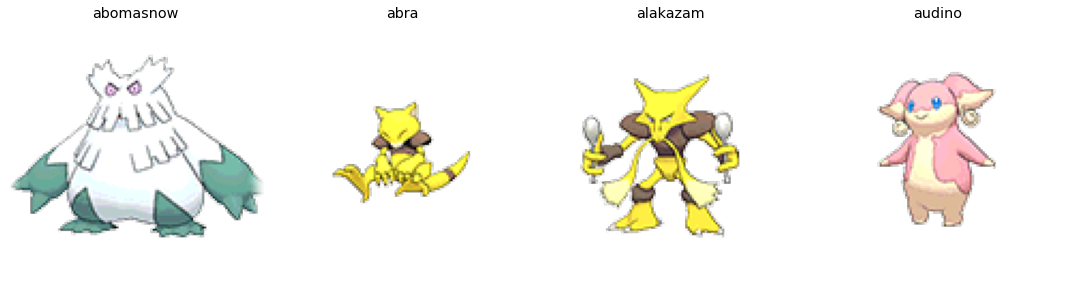

In [40]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,10))
ax = [ax1,ax2,ax3,ax4]

for i in range(4):
  img = mpimg.imread(path+data['Name'][i**3]+'.png')
  ax[i].imshow(img)
  ax[i].set_title(data['Name'][i**3])
  ax[i].axis('off')

plt.tight_layout()
plt.show()

In [41]:
img_name = sorted(os.listdir('./images/images/'))
img_paths = []
for i in img_name:
  img_paths.append(path+i)
data['path'] = img_paths

In [42]:
data.head()

,Name,Type1,Type2,path
0,abomasnow,Grass,Ice,./images/images/abomasnow.png
1,abra,Psychic,NaN,./images/images/abra.png
2,absol,Dark,NaN,./images/images/absol.png
3,accelgor,Bug,NaN,./images/images/accelgor.png
4,aegislash-blade,Steel,Ghost,./images/images/aegislash-blade.png


In [43]:
data['Type1'].unique()

array(['Grass', 'Psychic', 'Dark', 'Bug', 'Steel', 'Rock', 'Normal',
       'Water', 'Dragon', 'Electric', 'Poison', 'Fire', 'Fairy', 'Ice',
       'Ground', 'Ghost', 'Fighting', 'Flying'], dtype=object)

In [44]:
data['Type2'].unique()

array(['Ice', nan, 'Ghost', 'Flying', 'Rock', 'Poison', 'Bug', 'Fairy',
       'Psychic', 'Water', 'Ground', 'Steel', 'Fighting', 'Dark', 'Grass',
       'Fire', 'Electric', 'Dragon', 'Normal'], dtype=object)

In [45]:
Type = []
ind = []

for i in range(data.shape[0]):
    if (data.iloc[i]['Type1']=='Grass') or (data.iloc[i]['Type2']=='Grass'):
        Type.append('Grass')
        ind.append(1)
    elif (data.iloc[i]['Type1']=='Water') or (data.iloc[i]['Type2']=='Water'):
        Type.append('Water')
        ind.append(2)
    elif (data.iloc[i]['Type1']=='Fire') or (data.iloc[i]['Type2']=='Fire'):
        Type.append('Fire')
        ind.append(3)
    elif (data.iloc[i]['Type1']=='Psychic') or (data.iloc[i]['Type2']=='Psychic'):
        Type.append('Psychic')
        ind.append(4)
    elif (data.iloc[i]['Type1']=='Normal') or (data.iloc[i]['Type2']=='Normal'):
        Type.append('Normal')
        ind.append(5)
    elif (data.iloc[i]['Type1']=='Ground') or (data.iloc[i]['Type2']=='Ground'):
        Type.append('Fire')
        ind.append(6)
  
    else:
        Type.append('NaN')
        ind.append('NaN')

In [46]:
data["type"]=Type
data["ind"]=ind
data = data.drop(['Type1', 'Type2', 'Name'], axis=1)
data = data[data['type']!='NaN']

In [47]:
data.head()

,path,type,ind
0,./images/images/abomasnow.png,Grass,1
1,./images/images/abra.png,Psychic,4
7,./images/images/aipom.png,Normal,5
8,./images/images/alakazam.png,Psychic,4
9,./images/images/alomomola.png,Water,2


In [49]:
data['type'].unique()

array(['Grass', 'Psychic', 'Normal', 'Water', 'Fire'], dtype=object)

Text(0, 0.5, 'number of images')

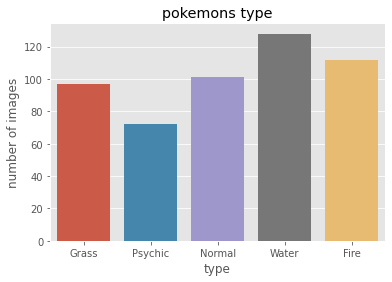

In [48]:
sns.countplot(x=data.type,)
plt.title('pokemons type')
plt.ylabel('number of images')

In [50]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

train_generator = train_datagenerator.flow_from_dataframe(
    data, 
    x_col='path', 
    y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    data , 
    x_col='path',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 459 validated image filenames belonging to 5 classes.
Found 51 validated image filenames belonging to 5 classes.


(120, 120, 4)
(5,)
(120, 120, 4)
(5,)
(120, 120, 4)
(5,)
(120, 120, 4)
(5,)
(120, 120, 4)
(5,)
(120, 120, 4)
(5,)


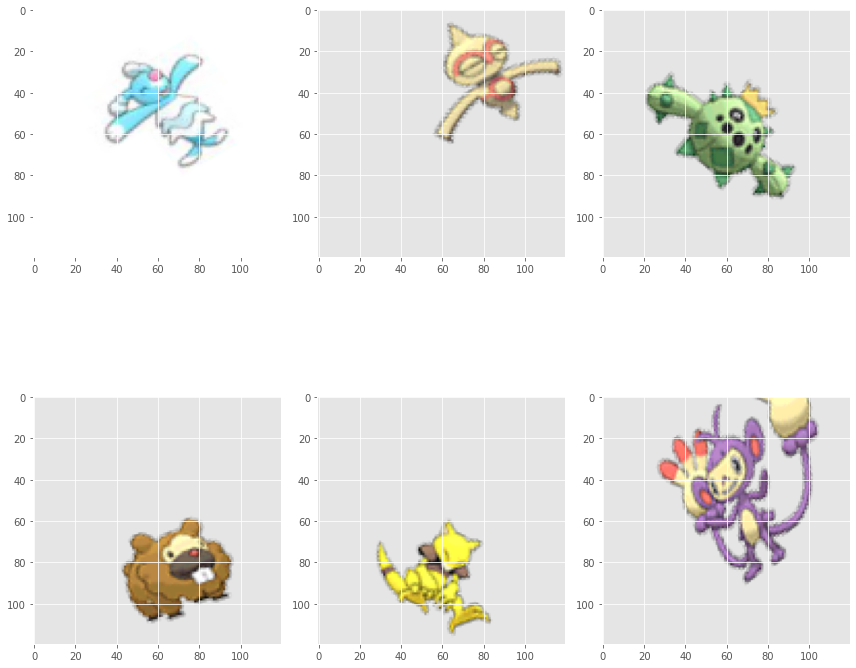

In [68]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in validation_generator:
        image = X_batch[0]
        print(image.shape)
        plt.imshow(image)
        print(Y_batch[0].shape)
        break
plt.tight_layout()
plt.show()

(120, 120, 4)
[1. 0. 0. 0. 0.]
(120, 120, 4)
[1. 0. 0. 0. 0.]
(120, 120, 4)
[0. 0. 0. 1. 0.]
(120, 120, 4)
[1. 0. 0. 0. 0.]
(120, 120, 4)
[0. 0. 1. 0. 0.]
(120, 120, 4)
[0. 1. 0. 0. 0.]


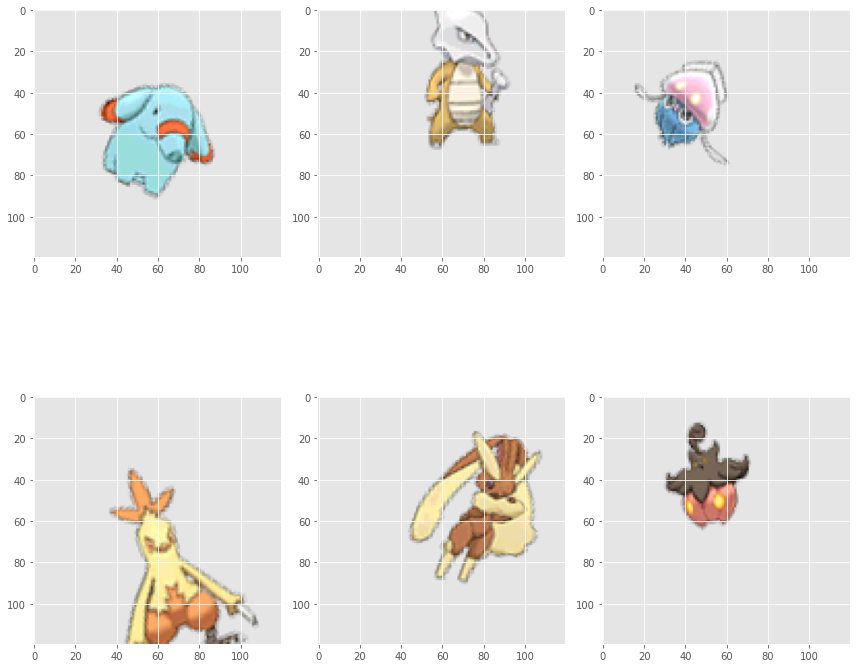

In [63]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        print(image.shape)
        plt.imshow(image)
        print(Y_batch[0])
        break
plt.tight_layout()
plt.show()

In [52]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(4, input_shape=(120, 120, 4)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
        
model.add(keras.layers.Dense(1024, activation='relu'))

model.add(keras.layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
        

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120, 120, 4)       20        
                                                                 
 conv2d (Conv2D)             (None, 118, 118, 64)      2368      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 256)       2

In [69]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [70]:
model.layers

In [71]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.7) and (logs.get('val_acc')>0.7):
            print('\n reached 70% accuarcy so stopping training')
            self.model.stop_training = True
callbacks = myCallback()

In [72]:
batch_size=15
FAST_FUN = False

In [73]:
epochs=5 if FAST_FUN else 100
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(), 
        callbacks
    ]
)

Epoch 1/100
15/15 [==============================] - 6s 283ms/step - loss: 1.7390 - acc: 0.2092 - val_loss: 1.6060 - val_acc: 0.2745 - lr: 0.0010
Epoch 2/100
15/15 [==============================] - 3s 223ms/step - loss: 1.5990 - acc: 0.2484 - val_loss: 1.6085 - val_acc: 0.2745 - lr: 0.0010
Epoch 3/100
15/15 [==============================] - 3s 224ms/step - loss: 1.6057 - acc: 0.2462 - val_loss: 1.6091 - val_acc: 0.2745 - lr: 0.0010
Epoch 4/100
15/15 [==============================] - 3s 223ms/step - loss: 1.5928 - acc: 0.2614 - val_loss: 1.6220 - val_acc: 0.2157 - lr: 0.0010
Epoch 5/100
15/15 [==============================] - 3s 223ms/step - loss: 1.5937 - acc: 0.2418 - val_loss: 1.6131 - val_acc: 0.2157 - lr: 0.0010
Epoch 6/100
15/15 [==============================] - 3s 220ms/step - loss: 1.5946 - acc: 0.2505 - val_loss: 1.6083 - val_acc: 0.2745 - lr: 0.0010
Epoch 7/100
15/15 [==============================] - 4s 253ms/step - loss: 1.5891 - acc: 0.2549 - val_loss: 1.6068 - val_acc

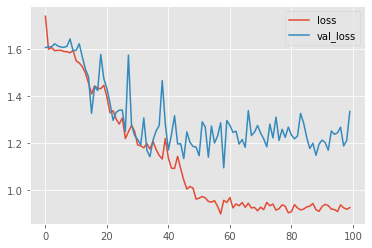

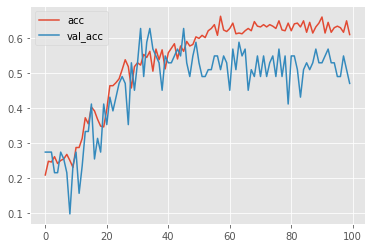

In [74]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['acc', 'val_acc']].plot();

tf.Tensor([0.24998756 0.05521715 0.30610517 0.13724528 0.25144485], shape=(5,), dtype=float32)
tf.Tensor([0.48378152 0.03109833 0.3993473  0.03957882 0.04619398], shape=(5,), dtype=float32)
tf.Tensor([0.03935343 0.02578712 0.18632631 0.23707932 0.51145387], shape=(5,), dtype=float32)
tf.Tensor([5.7540447e-03 8.8062626e-01 4.8201535e-02 6.4928666e-02 4.8951188e-04], shape=(5,), dtype=float32)
tf.Tensor([0.07091644 0.38348743 0.29423857 0.20266886 0.04868865], shape=(5,), dtype=float32)
tf.Tensor([0.48320305 0.02277962 0.4274913  0.02362841 0.04289755], shape=(5,), dtype=float32)


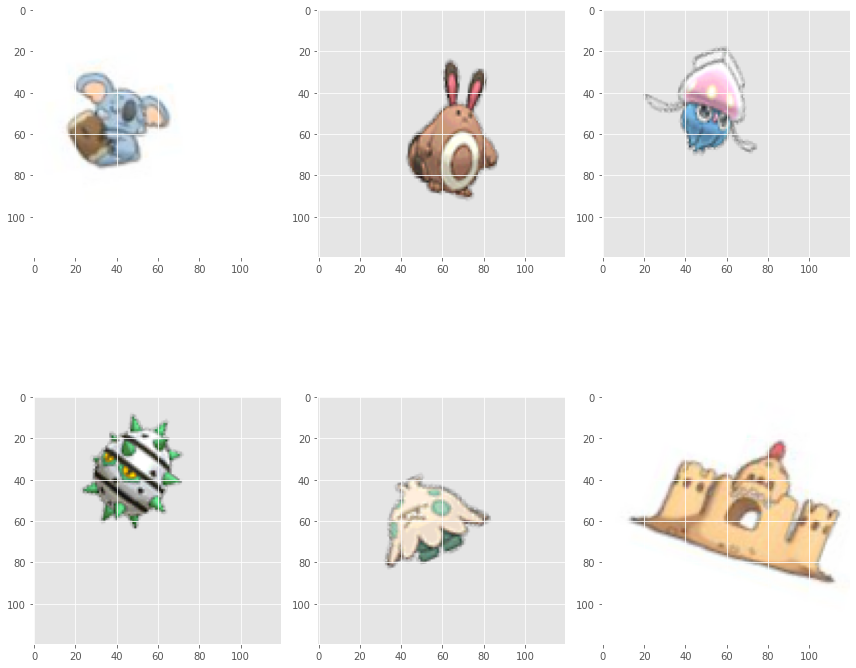

In [78]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        g = model(X_batch)
        print(g[0])
        break
plt.tight_layout()
plt.show()

(['Grass', 'Psychic', 'Normal', 'Water', 'Fire'], dtype=object)